# GATHER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import time
import seaborn as sns
import re

> Load the files

In [162]:
twitter_archive=pd.read_csv('twitter-archive-enhanced-2.csv')

In [163]:
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# Personal API keys, secrets, and tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [6]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# List of the error tweets
error_list = []
# List of tweets
df = []
# Calculate the time of execution
start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        date_time = tweet['created_at'] # The date and time of the creation
        
        df.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),                        
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
# Calculate the time of excution
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [8]:
# Create DataFrames from list of dictionaries
df_tweets = pd.DataFrame(df, columns = ['tweet_id', 'favorites', 'retweets', 'date_time'])               

# Save the dataFrame in file
df_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [9]:
data_tweet = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
data_tweet.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,34751,7285,2017-08-01 16:23:56+00:00
1,892177421306343426,30126,5446,2017-08-01 00:17:27+00:00
2,891815181378084864,22674,3587,2017-07-31 00:18:03+00:00
3,891689557279858688,38012,7470,2017-07-30 15:58:51+00:00
4,891327558926688256,36297,8032,2017-07-29 16:00:24+00:00


In [10]:
print(len(df))
print(len(error_list))

2330
26


# Assess

In [164]:
twitter_archive[:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [165]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [166]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [167]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [168]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [169]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [170]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg                                            1
https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg                                            1
https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg                                            1
https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg                                            1
https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg                       

In [171]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [172]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [173]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [174]:
data_tweet

,tweet_id,favorites,retweets,date_time
0,892420643555336193,34751,7285,2017-08-01 16:23:56+00:00
1,892177421306343426,30126,5446,2017-08-01 00:17:27+00:00
2,891815181378084864,22674,3587,2017-07-31 00:18:03+00:00
3,891689557279858688,38012,7470,2017-07-30 15:58:51+00:00
4,891327558926688256,36297,8032,2017-07-29 16:00:24+00:00
...,...,...,...,...
2325,666049248165822465,92,37,2015-11-16 00:24:50+00:00
2326,666044226329800704,255,120,2015-11-16 00:04:52+00:00
2327,666033412701032449,105,38,2015-11-15 23:21:54+00:00
2328,666029285002620928,117,41,2015-11-15 23:05:30+00:00


In [175]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2330 non-null   int64 
 1   favorites  2330 non-null   int64 
 2   retweets   2330 non-null   int64 
 3   date_time  2330 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [176]:
data_tweet.describe()

,tweet_id,favorites,retweets
count,2.330000e+03,2330.000000,2330.000000
mean,7.419011e+17,7261.713305,2565.268670
std,6.824557e+16,11276.003962,4337.935273
min,6.660209e+17,0.000000,1.000000
25%,6.782612e+17,1258.250000,520.000000
50%,7.182408e+17,3145.000000,1196.500000
75%,7.986712e+17,8873.500000,2972.750000
max,8.924206e+17,149276.000000,73517.000000


In [177]:
sum(image_predictions['jpg_url'].duplicated())

66

## Quality

- The numerator has some wrong values.
- We only want to see original ratings (no retweets) 
- Remove the columns which we don't require for analysis
- doggo, floofer, pupper, and puppo have missing values with "None" instead of NaN
- There are 2075 rows in the images dataframe and 2356 rows in the archive dataframe.
- Several columns have empty values, like in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- invalid dog names e.g. 'a', 'The', 'an' need to be corrected, set them to 'None'.
- timestamp needs to be converted from string format to actual timestamp format
- tweet_id needs to be converted from interger to string.

## Tidiness

- Merge the entire data
- 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'
- p1_dog, p2_dog and p3_dog columns contain dog breed predictions. Creating a new column to identify the breed of the dogs.

# Cleaning

In [178]:
#copy dataframes
data_tweet_copy = data_tweet.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()

**DEFINE**
> Add data_tweet and image_predictions to twitter_archive table.

**CODE**

In [179]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=data_tweet_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

In [180]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_copy, on='tweet_id', how='inner')

**TEST**

In [181]:
twitter_archive_clean[:2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**DEFINE**
> doggo, floofer, pupper, and puppo have missing values with "None" instead of NaN

**CODE**

In [182]:
twitter_archive_clean['doggo'].replace('None', np.nan, inplace = True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace = True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace = True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace = True)

**TEST**

In [183]:
print(twitter_archive_clean['doggo'].value_counts())
print("")
print(twitter_archive_clean['floofer'].value_counts())
print("")
print(twitter_archive_clean['pupper'].value_counts())
print("")
print(twitter_archive_clean['puppo'].value_counts())


doggo    78
Name: doggo, dtype: int64

floofer    8
Name: floofer, dtype: int64

pupper    220
Name: pupper, dtype: int64

puppo    24
Name: puppo, dtype: int64


**DEFINE**
>Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

**CODE**

In [184]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [185]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

**TEST**

In [186]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

pupper     229
doggo       73
puppo       28
floofer      3
Name: dog_stage, dtype: int64
2058


**DEFINE**
> We only want Original tweets

**CODE**

In [187]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean= twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean= twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

**TEST**

In [188]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2057
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1987 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1987 non-null   object 
 4   source                      1987 non-null   object 
 5   text                        1987 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1987 non-null   object 
 10  rating_numerator            1987 non-null   int64  
 11  rating_denominator          1987 non-null   int64  
 12  name                        1987 non-null   object 
 13  favorites                   1987 

**DEFINE**
> Clean columns that we will not need

**CODE**

In [189]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls','date_time'], 1)

**TEST**

In [190]:
twitter_archive_clean[:5]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,34751,7285,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,30126,5446,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,22674,3587,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,38012,7470,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,36297,8032,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


**DEFINE**
> Clean the rows

**CODE**

In [191]:
# Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])



**TEST**

In [192]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))
twitter_archive_clean.info()

pupper     223
doggo       71
puppo       27
floofer      3
Name: dog_stage, dtype: int64
1987
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2057
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   timestamp           1987 non-null   object 
 2   source              1987 non-null   object 
 3   text                1987 non-null   object 
 4   rating_numerator    1987 non-null   int64  
 5   rating_denominator  1987 non-null   int64  
 6   name                1987 non-null   object 
 7   favorites           1987 non-null   int64  
 8   retweets            1987 non-null   int64  
 9   jpg_url             1987 non-null   object 
 10  img_num             1987 non-null   int64  
 11  p1                  1987 non-null   object 
 12  p1_conf             1987 non-null   float64
 13  p1_dog              1987 non-null   bool   
 14  p2       

**DEFINE**
>Condensing dog breed predictions

**CODE**

In [193]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

twitter_archive_clean.apply(breed_conf, axis = 1)

twitter_archive_clean['breed'] = breed
twitter_archive_clean['confidence'] = conf

In [194]:
#removing the processed columns
twitter_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [195]:
#drop rows that has prediction_list 'Unidentifiable'
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['breed'] != 'Unidentifiable']

**TEST** 

In [196]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1679 non-null   int64  
 1   timestamp           1679 non-null   object 
 2   source              1679 non-null   object 
 3   text                1679 non-null   object 
 4   rating_numerator    1679 non-null   int64  
 5   rating_denominator  1679 non-null   int64  
 6   name                1679 non-null   object 
 7   favorites           1679 non-null   int64  
 8   retweets            1679 non-null   int64  
 9   jpg_url             1679 non-null   object 
 10  img_num             1679 non-null   int64  
 11  dog_stage           272 non-null    object 
 12  breed               1679 non-null   object 
 13  confidence          1679 non-null   float64
dtypes: float64(1), int64(6), object(7)
memory usage: 196.8+ KB


**DEFINE**
>Drop 66 jpg_url duplicated

**CODE**

In [197]:
#Delete duplicated jpg_url
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**TEST**

In [198]:
sum(twitter_archive_clean['jpg_url'].duplicated())

0

**DEFINE**
>Convert timestamp to datetime object

**CODE**

In [199]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**TEST**

In [200]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1679 non-null   int64              
 1   timestamp           1679 non-null   datetime64[ns, UTC]
 2   source              1679 non-null   object             
 3   text                1679 non-null   object             
 4   rating_numerator    1679 non-null   int64              
 5   rating_denominator  1679 non-null   int64              
 6   name                1679 non-null   object             
 7   favorites           1679 non-null   int64              
 8   retweets            1679 non-null   int64              
 9   jpg_url             1679 non-null   object             
 10  img_num             1679 non-null   int64              
 11  dog_stage           272 non-null    object             
 12  breed               1679 non-null 

**DEFINE**
>Extract Dog Rates and Dog Count

**CODE**

In [201]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

twitter_archive_clean['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
twitter_archive_clean['rating'] = rating # not need to also add denominator since they are all 10!
twitter_archive_clean['dog_count'] = dog_count
twitter_archive_clean['rating'].value_counts()

12.0                 423
11.0                 359
10.0                 351
13.0                 225
9.0                  134
8.0                   67
7.0                   32
14.0                  24
6.0                   16
5.0                   11
4.0                    6
3.0                    5
8.5                    3
7.5                    3
9.5                    3
10.5                   2
2.0                    2
5.5                    2
6.5                    2
NaN                    1
0.0                    1
13.5                   1
11.5                   1
4.5                    1
9.666666666666666      1
11.26                  1
9.75                   1
11.27                  1
Name: rating, dtype: int64

In [202]:
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

**TEST**

In [203]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2057
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    1679 non-null   int64              
 1   timestamp   1679 non-null   datetime64[ns, UTC]
 2   source      1679 non-null   object             
 3   text        1679 non-null   object             
 4   name        1679 non-null   object             
 5   favorites   1679 non-null   int64              
 6   retweets    1679 non-null   int64              
 7   jpg_url     1679 non-null   object             
 8   img_num     1679 non-null   int64              
 9   dog_stage   272 non-null    object             
 10  breed       1679 non-null   object             
 11  confidence  1679 non-null   float64            
 12  rating      1679 non-null   object             
 13  dog_count   1679 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), i

**DEFINE**
> Converting the dtypes of the column

**CODE**

In [204]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating']=twitter_archive_clean['rating'].astype('float')


**TEST**

In [205]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2057
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    1679 non-null   object             
 1   timestamp   1679 non-null   datetime64[ns, UTC]
 2   source      1679 non-null   category           
 3   text        1679 non-null   object             
 4   name        1679 non-null   object             
 5   favorites   1679 non-null   int32              
 6   retweets    1679 non-null   int32              
 7   jpg_url     1679 non-null   object             
 8   img_num     1679 non-null   int64              
 9   dog_stage   272 non-null    category           
 10  breed       1679 non-null   object             
 11  confidence  1679 non-null   float64            
 12  rating      1678 non-null   float64            
 13  dog_count   1679 non-null   float64            
dtypes: category(2), datetime64[ns, UTC](1), 

**DEFINE**
> name has None instead of NaN

**CODE**

In [206]:
twitter_archive_clean['name'].replace('None', np.nan, inplace = True)

**TEST**

In [207]:
twitter_archive_clean['name'].value_counts()

a          46
Cooper     10
Charlie     9
Tucker      9
Oliver      9
           ..
Halo        1
Asher       1
Kaia        1
Nigel       1
space       1
Name: name, Length: 849, dtype: int64

# Storing and Analysis

In [208]:
#Store the clean DataFrame in a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [209]:
twitter_archive_clean['breed'].value_counts()

golden_retriever      158
Labrador_retriever    106
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
standard_schnauzer      1
Scotch_terrier          1
Irish_wolfhound         1
Japanese_spaniel        1
EntleBucher             1
Name: breed, Length: 113, dtype: int64

In [210]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

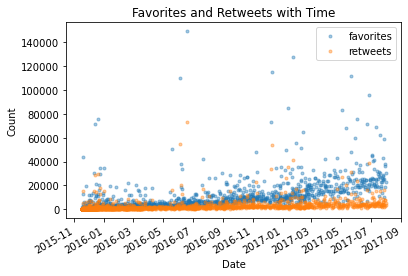

In [211]:
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

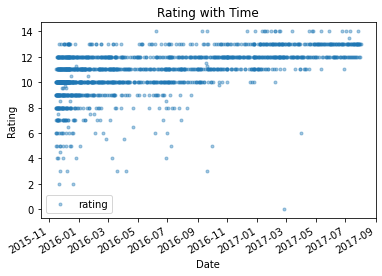

In [212]:
twitter_archive_clean.plot(y ='rating', x='timestamp', style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

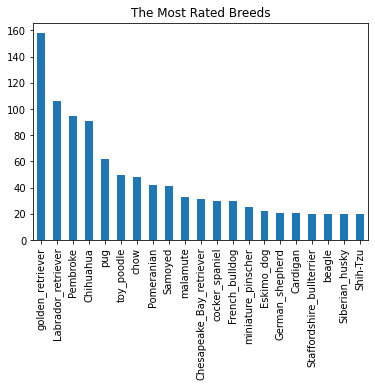

In [213]:
top=twitter_archive_clean.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

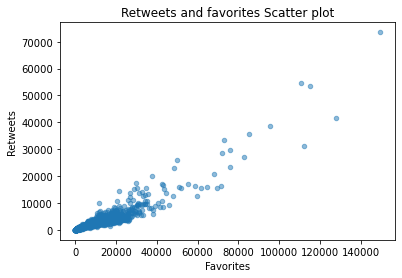

In [214]:
twitter_archive_clean.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

(-1.2886097752777455,
 1.239372769668777,
 -1.2184108808483307,
 1.2103376347349522)

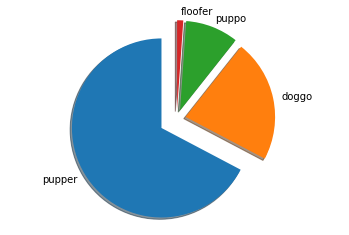

In [215]:
# Plot the data partitioned by dog stage
dog_stage_count = list(twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

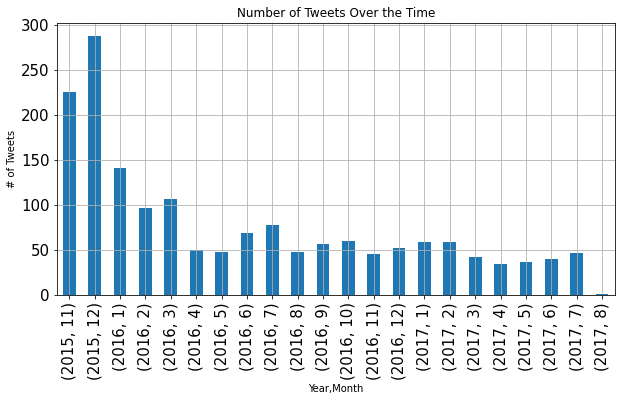

In [216]:
temp_df = twitter_archive_clean.tweet_id.groupby([twitter_archive_clean["timestamp"].rename('Year').dt.year, twitter_archive_clean["timestamp"].rename('Month').dt.month]).count()

# Set kind Bar or Line 
temp_df.plot(kind='bar', figsize=(10,5),grid=True, fontsize =15,x='timestamp',
             title = 'Number of Tweets Over the Time').set_ylabel('# of Tweets')
ax = plt.gca()

plt.show();